In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
df = pd.read_csv('../datasets/iris.csv')

In [3]:
df.head() #データの確認

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.iloc[:, :4].head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [24]:
from sklearn.cluster import KMeans # K-means クラスタリングをおこなう

kmeans_model = KMeans(n_clusters=4, random_state=10).fit(df.iloc[:, :4])

In [25]:
labels = kmeans_model.labels_

In [26]:
from collections import Counter
print(Counter(labels))

Counter({0: 50, 3: 41, 1: 32, 2: 27})


In [27]:
# それぞれに与える色を決める。
color_codes = {0:'Red', 1:'Blue', 2:'Green',3:'Yellow'}

In [28]:
colors = [color_codes[x] for x in labels]

In [29]:
from sklearn.decomposition import PCA #主成分分析器
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:,:4])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
feature = pca.transform(df.iloc[:,:4])

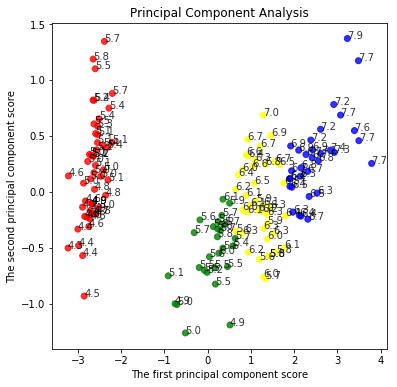

In [31]:
plt.figure(figsize=(6, 6))
for x, y, name in zip(feature[:, 0], feature[:, 1], df.iloc[:,0]):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component score")
plt.ylabel("The second principal component score")
plt.show()